In [1]:
pip install kaggle


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from kaggle.api.kaggle_api_extended import KaggleApi
os.environ['KAGGLE_CONFIG_DIR'] = '/Users/inayat/Downloads/kaggle.json'


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"inayat514","key":"24d0b431765bf0986b5066783f1e1aba"}'}

In [3]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!pip install -q kaggle

In [5]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
from kaggle.api.kaggle_api_extended import KaggleApi


In [11]:
os.environ['KAGGLE_CONFIG_DIR'] = '/Users/inayat/Downloads/kaggle.json'


In [12]:
api = KaggleApi()
api.authenticate()

In [13]:
api.dataset_download_files('chetankv/dogs-cats-images')


Dataset URL: https://www.kaggle.com/datasets/chetankv/dogs-cats-images


In [15]:
import zipfile
with zipfile.ZipFile('dogs-cats-images.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [16]:
data_dir = 'data/dataset/training_set'
categories = ['cats', 'dogs']
data = []

In [17]:
from PIL import Image

In [18]:
desired_size = (100, 100)
data_resized = []

In [19]:
for category in categories:
    path = os.path.join(data_dir, category)
    label = categories.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = Image.open(img_path)
        img_array = img_array.resize(desired_size, Image.ANTIALIAS)
        data_resized.append([np.array(img_array), label])

<ipython-input-19-393046c66240>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_array = img_array.resize(desired_size, Image.ANTIALIAS)


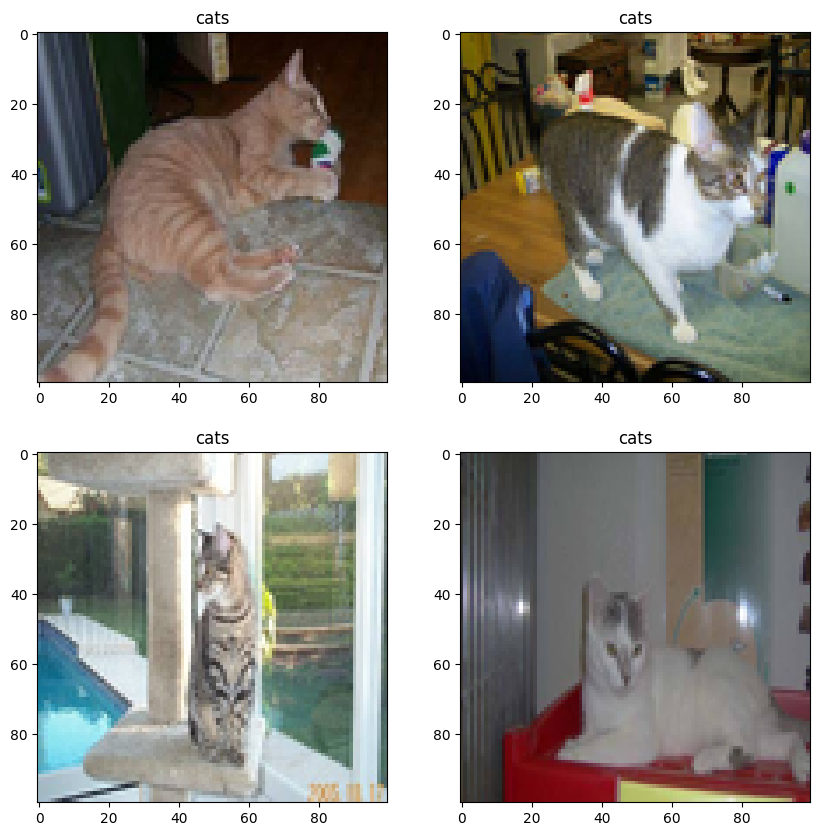

In [20]:
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(data_resized[i][0])
    plt.title(categories[data_resized[i][1]])
plt.show()


In [21]:
X = np.array([x[0] for x in data_resized])
y = np.array([x[1] for x in data_resized])


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:

svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=20)),
    ('svm', SVC(kernel='linear', C=1.0))
])

subset_size = 1000
svm_model.fit(X_train[:subset_size].reshape(len(X_train[:subset_size]), -1), y_train[:subset_size])


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=20)),
                ('svm', SVC(kernel='linear'))])

In [24]:
y_pred = svm_model.predict(X_test.reshape(len(X_test), -1))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.543125
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.49      0.52       804
           1       0.54      0.60      0.56       796

    accuracy                           0.54      1600
   macro avg       0.54      0.54      0.54      1600
weighted avg       0.54      0.54      0.54      1600



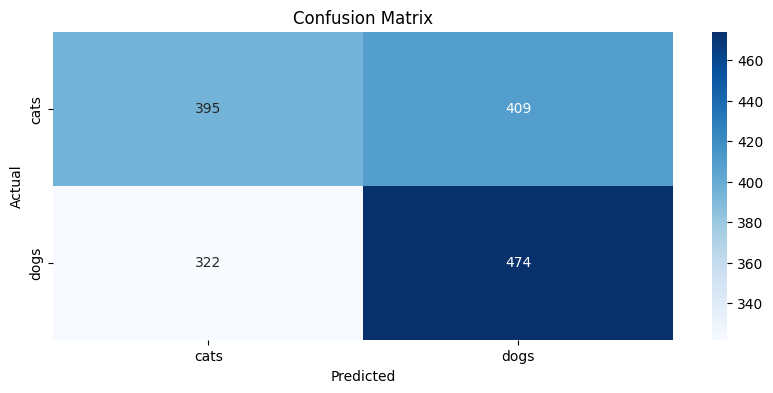

In [26]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()